In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [181]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [182]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [183]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 [==============================] - 64s 134ms/step - loss: 2.2761 - accuracy: 0.1738 - val_loss: 2.2336 - val_accuracy: 0.3988
Epoch 2/10
469/469 [==============================] - 66s 141ms/step - loss: 2.2064 - accuracy: 0.3087 - val_loss: 2.1469 - val_accuracy: 0.5154
Epoch 3/10
469/469 [==============================] - 60s 129ms/step - loss: 2.1140 - accuracy: 0.4172 - val_loss: 2.0270 - val_accuracy: 0.5992
Epoch 4/10
469/469 [==============================] - 60s 129ms/step - loss: 1.9844 - accuracy: 0.5034 - val_loss: 1.8608 - val_accuracy: 0.6720
Epoch 5/10
469/469 [==============================] - 60s 129ms/step - loss: 1.8118 - accuracy: 0.5735 - val_loss: 1.6435 - val_accuracy: 0.7321
Epoch 6/10
469/469 [==============================] - 60s 128ms/step - loss: 1.6023 - accuracy: 0.6219 - val_loss: 1.3926 - val_accuracy: 0.7730
Epoch 7/10
469/469 [==============================] - 60s 128ms/step - loss: 1.3792 - accuracy: 0.6663 - val_loss: 1.1480 - val_ac

In [184]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7057050466537476
Test accuracy: 0.8434000015258789


# ANOTHER MODEL(WORKING MAIN)

In [2]:
import  idx2numpy
X = idx2numpy.convert_from_file('train-images.idx3-ubyte')
Y = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

X_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
Y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [3]:
X.shape

(60000, 28, 28)

In [4]:
X=X.reshape(60000,784)

In [5]:
X.shape

(60000, 784)

In [6]:
Y.shape

(60000,)

In [7]:
Y=Y.reshape(60000,1)

In [8]:
Y.shape

(60000, 1)

In [10]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid


import matplotlib.pyplot as plt
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from autils import *

np.set_printoptions(precision=2)

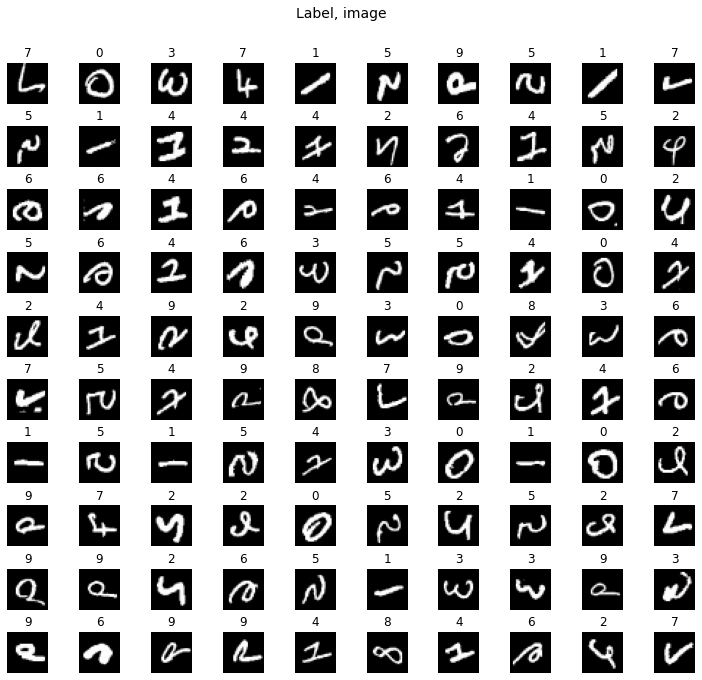

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(10,10, figsize=(10,10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(Y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [14]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
         
        tf.keras.Input(shape=(784,)), 
        Dense(25, activation='relu', name = "L1"), 
        Dense(15, activation='relu',  name = "L2"),   
        Dense(10, activation='linear', name = "L3"),  
         
    ], name = "my_model" 
)

In [15]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [29]:
[layer1, layer2, layer3] = model.layers

In [30]:
def load_weights():
    w1 = np.load("w1.npy")
    b1 = np.load("b1.npy")
    w2 = np.load("w2.npy")
    b2 = np.load("b2.npy")
    return w1, b1, w2, b2

In [31]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [35]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,Y,
    epochs=40
)

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0572
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0420
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9051
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7262
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5331
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4523
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4209
Epoch 8/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3999
Epoch 9/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3778
Epoch 10/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3617
Epoch 11/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3459
Epoch 12/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3339
E

In [50]:
def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

In [53]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (8,6))
    widgvis(fig)
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

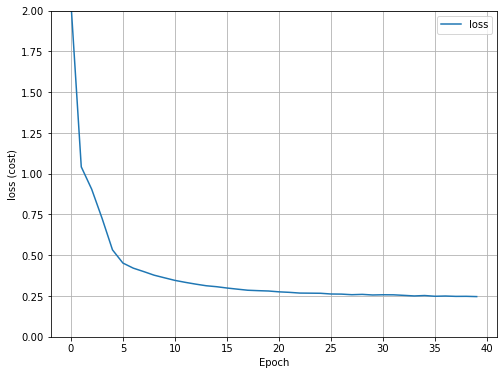

In [54]:
plot_loss_tf(history)

In [57]:
#This is image of handwritten 2
image_of_two = X[1015]

prediction = model.predict(image_of_two.reshape(1,784))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 66ms/step
 predicting a Two: 
[[ 8.39 -6.85 -0.78  1.71 -0.12  1.77 -1.13  0.47 -0.93  1.5 ]]
 Largest Prediction index: 0


In [60]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")




 predicting a Two. Probability vector: 
[[9.96e-01 2.39e-07 1.03e-04 1.25e-03 2.01e-04 1.33e-03 7.29e-05 3.62e-04
  8.95e-05 1.01e-03]]
Total of predictions: 1.000


In [61]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 0


1/1 [==============================] - 0s 15ms/step


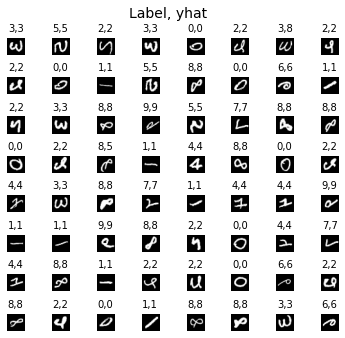

In [64]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{Y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

#   -------------------------------THANK YOU--------------------------------------------